In [92]:
%matplotlib inline
import nltk
from nltk.corpus import brown
import pandas as pd
import seaborn as sns
from __future__ import division

# Brown Corpus details

The brown corpus was first published in 1964, and most recently updated in 1979. It is designated a corpus of modern American English, and all entries have been contributed by speakers of native english.

The texts in the Brown corpus have been manually annotated for parts of speech. Other meta-data for the text include segmentations at the word, sentence, and paragraph level. The corpus is composed of 500 samples of text in 15 different categories of text. Each sample is approximately 2000 words long and begins at the beginning of a sentence. The sample ends at the first sentence ending after 2000 words.

The fiction samples included must have had less than 50% dialogue.

The corpus is organized into a number of hierarchical categories. At the top of this hierarchy is the division into Informative Prose and Imaginative Prose

|  Type | Number of Samples   |
|---|---:|
| Informative Prose  | 374  |
| Imaginative Prose  |  126 |

Within each of these higher-levels, there are a number of categories of text, listed below:

|Type   |Category   |Count   |
|---|---|--:|
|**Informative**   |Press: Reporting   |44   |
|   |Press: Editorial   |   27|
|   |Press: Reviews   |   17|
|   |Religion   |   17|
|   |Skills & Hobbies  |   36|
|   |Popular Lore   |   48|
|   |Belles Lettres, Biographies, Memoirs, etc   |   75|
|   |Miscellaneous   |   30|
|   |Learned   |   80|
|   |  *total*| **374**  |
|   |   |   |
|**Imaginative**   |General Fiction   |   29|
|   |Mystery   |   24|
|   |Science Fiction   |   6|
|   |Adventure   |   29|
|   |Romance   |   29|
|   |Humor   |   9|
|   | *total* |   **126**|

In total, there are just over one million words of text in the corpus. These words are divided into the categories as follows:


In [65]:
category_dict={'adventure': 'Adventure',
              'belles_lettres': 'Belles Letres, Biographies, Memoirs, etc',
              'editorial': 'Press: Editorial',
              'fiction': 'General Fiction',
              'government': 'Miscellaneous',
              'hobbies': 'Skills & Hobbies',
              'humor': 'Humor',
              'learned': 'Learned',
              'lore': 'Popular Lore',
              'mystery': 'Mystery',
              'news': 'News',
              'religion': 'Religion',
              'reviews': 'Reviews',
              'romance': 'Romance',
              'science_fiction': 'Science Fiction'}
print('Category', 'Number of words')
print('********************')
for i in brown.categories():
    print(category_dict[i], len(brown.words(categories=i)))

('Category', 'Number of words')
********************
('Adventure', 69342)
('Belles Letres, Biographies, Memoirs, etc', 173096)
('Press: Editorial', 61604)
('General Fiction', 68488)
('Miscellaneous', 70117)
('Skills & Hobbies', 82345)
('Humor', 21695)
('Learned', 181888)
('Popular Lore', 110299)
('Mystery', 57169)
('News', 100554)
('Religion', 39399)
('Reviews', 40704)
('Romance', 70022)
('Science Fiction', 14470)


More interestingly, we can examine the number of unique words in each set. This is known as the type-token ratio, and though it isn't a perfect metric, it can reveal some interesting things about differences in genres.

In [93]:
type_toke_dict = {}
for i in brown.categories():
    type_toke_dict[category_dict[i]] = len(set(brown.words(categories=i)))/len(brown.words(categories=i))

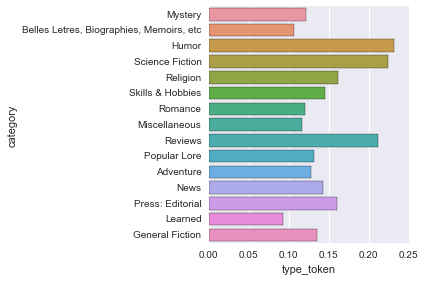

In [94]:
df = pd.DataFrame(type_toke_dict.items(), columns=['category', 'type_token'])
sns.factorplot(y='category', x='type_token', data=df, kind='bar', orient='h', size=4, aspect=1.5)

In [174]:
from nltk.corpus import masc_tagged
import xml.etree.ElementTree as ET

In [124]:
e = xml.etree.ElementTree.parse('../../../Downloads/MASC-3.0.0/data/written/fiction/Nathans_Bylichka-ne.xml')
root = e.getroot()
for child in root:
    print(child.tag, child.attrib)

('{http://www.xces.org/ns/GrAF/1.0/}graphHeader', {})
('{http://www.xces.org/ns/GrAF/1.0/}node', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-n0'})
('{http://www.xces.org/ns/GrAF/1.0/}a', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-N65579', 'as': 'anc', 'ref': 'ne-n0', 'label': 'person'})
('{http://www.xces.org/ns/GrAF/1.0/}node', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-n1'})
('{http://www.xces.org/ns/GrAF/1.0/}a', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-N65595', 'as': 'anc', 'ref': 'ne-n1', 'label': 'person'})
('{http://www.xces.org/ns/GrAF/1.0/}node', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-n10'})
('{http://www.xces.org/ns/GrAF/1.0/}a', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-N65615', 'as': 'anc', 'ref': 'ne-n10', 'label': 'location'})
('{http://www.xces.org/ns/GrAF/1.0/}node', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-n100'})
('{http://www.xces.org/ns/GrAF/1.0/}a', {'{http://www.w3.org/XML/1998/namespace}id': 'ne-N65635', 'as': 'an

In [132]:
e = xml.etree.ElementTree.parse('/Users/triddle/Downloads/e4ce7b65840a7cef4a6820f2f7a913c7/110CYL067.xml')
root = e.getroot()
for child in root:
    print(child.tag, child.attrib)

('{http://www.xces.org/schema/2003}text', {})


In [241]:
import lxml.etree as etree
xml_data = open('/Users/triddle/Downloads/e4ce7b65840a7cef4a6820f2f7a913c7/NYTnewswire3.xml').read()
from bs4 import BeautifulSoup
soup = BeautifulSoup(xml_data, 'lxml')
for i in soup.find_all('p'):
    for item in i:
        if item.name in ['person', 'org', 'date', 'location']:
            print item.name, item.tok.string
    #print i.string
    #if i.parent in ['person', 'org', 'date', 'location']:
    #    print i.parent
#print(soup.prettify())

location EAST
location N.Y.
org IBM
date Wednesday
org IBM
location New
org IBM
org IBM
org Intel
location East
person John
org IBM
person Kelly
location Westchester
location N.Y.
person Kelly
location Asia
date early
date Wednesday
person George
location Hudson
org IBM
location New
person Samuel
org IBM
date June
org IBM
org Hitachi
person Kelly
org IBM
location Burlington
location Vt
org IBM
location East
person Richard
org Envisioneering
org IBM
date last
location East
person Richard


In [233]:
print(soup.prettify())

<?xml version="1.0" encoding="UTF-8"?>
<html>
 <body>
  <cesdoc id="ICIC039" version="1.0.4" xmlns="http://www.xces.org/schema/2003" xmlns:xces="http://www.xces.org/schema/2003" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
   <text>
    <p id="p1">
     <date kind="date" xmlns:anc="http://www.anc.org/ns/masc/">
      <tok base="june" msd="NNP" string="June">
       June
      </tok>
      <tok base="21" msd="CD" string="21">
       21
      </tok>
      <tok base="," msd="," string=",">
       ,
      </tok>
      <tok base="1999" msd="CD" string="1999">
       1999
      </tok>
     </date>
    </p>
    <p id="p2">
     <tok base="name" msd="NN" string="Name">
      Name
     </tok>
     <tok base="address" msd="NNP" string="Address">
      Address
     </tok>
     <tok base="city" msd="NNP" string="City">
      City
     </tok>
     <tok base="," msd="," string=",">
      ,
     </tok>
     <tok base="st" msd="NNP" string="ST">
   

In [178]:
xml_data = open('/Users/triddle/Downloads/e4ce7b65840a7cef4a6820f2f7a913c7/110CYL067.xml').read()
dat = xml2df(xml_data)
dat.head()

,{http://www.xces.org/schema/2003}body
0,\n


In [50]:
parag = brown.tagged_paras(fileids='cn20')
parag.unicode_repr()

u"[[[(u'They', u'PPSS'), (u'were', u'BED'), (u'west', u'NR'), (u'of', u'IN'), (u'the', u'AT'), (u'Sabine', u'NP'), (u',', u','), (u'but', u'CC'), (u'only', u'AP'), (u'God', u'NP'), (u'knew', u'VBD'), (u'where', u'WRB'), (u'.', u'.')]], [[(u'For', u'IN'), (u'three', u'CD'), (u'days', u'NNS'), (u',', u','), (u'their', u'PP$'), (u'stolid', u'JJ'), (u'oxen', u'NNS'), (u'had', u'HVD'), (u'plodded', u'VBN'), (u'up', u'IN'), (u'a', u'AT'), (u'blazing', u'VBG'), (u'valley', u'NN'), (u'as', u'QL'), (u'flat', u'JJ'), (u'and', u'CC'), (u'featureless', u'JJ'), (u'as', u'CS'), (u'a', u'AT'), (u'dead', u'JJ'), (u'sea', u'NN'), (u'.', u'.')], [(u'Molten', u'JJ'), (u'glare', u'NN'), (u'singed', u'VBD'), (u'their', u'PP$'), (u'eyelids', u'NNS'), (u'an', u'AT'), (u'angry', u'JJ'), (u'crimson', u'NN'), (u';', u'.'), (u';', u'.')], [(u'suffocating', u'VBG'), (u'air', u'NN'), (u'sapped', u'VBD'), (u'their', u'PP$'), (u'strength', u'NN'), (u'and', u'CC'), (u'strained', u'VBD'), (u'their', u'PP$'), (u'nerves

In [26]:
brown.readme()

u'BROWN CORPUS\n\nA Standard Corpus of Present-Day Edited American\nEnglish, for use with Digital Computers.\n\nby W. N. Francis and H. Kucera (1964)\nDepartment of Linguistics, Brown University\nProvidence, Rhode Island, USA\n\nRevised 1971, Revised and Amplified 1979\n\nhttp://www.hit.uib.no/icame/brown/bcm.html\n\nDistributed with the permission of the copyright holder,\nredistribution permitted.\n'